In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importamos librerias de Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
# Modelo
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [4]:
filename = "Bank Marketing train_set.csv"
df = pd.read_csv(filename)

In [ ]:
#Miro las primeras 10 filas de mi dataset para conocer las varibles
df.head(10)

NameError: ignored

In [ ]:
# Me fijo la cantidad de vacíos en cada columna 
df.isna().sum()

Age                      188
Job                       20
Marital Status             0
Education                  0
Default                    0
Balance (euros)          124
Housing Loan               0
Loan                       0
Contact                    0
Last Contact Day           0
Last Contact Month         0
Last Contact Duration      0
Campaign                   0
Pdays                     43
Previous                   0
Poutcome                   0
Subscription               0
dtype: int64

In [ ]:
# Me fijo la cantidad de vacíos en cada fila
df.isna().sum(axis=1)

0        0
1        0
2        0
3        1
4        0
        ..
38424    0
38425    0
38426    0
38427    0
38428    0
Length: 38429, dtype: int64

In [ ]:
#Cantidad de filas y columnas
df.shape

(38429, 17)

In [ ]:
#Cuales son numericas y cuales categoricas
df.dtypes

Age                      float64
Job                       object
Marital Status            object
Education                 object
Default                   object
Balance (euros)          float64
Housing Loan              object
Loan                      object
Contact                   object
Last Contact Day           int64
Last Contact Month        object
Last Contact Duration      int64
Campaign                   int64
Pdays                    float64
Previous                   int64
Poutcome                  object
Subscription               int64
dtype: object

In [ ]:
#Suma de valores Unicos
df["Marital Status"].value_counts()

married     23144
single      10864
divorced     4421
Name: Marital Status, dtype: int64

In [ ]:
#Suma de valores Unicos, Educación
df["Education"].value_counts()

secondary    19812
tertiary     11234
primary       5814
unknown       1569
Name: Education, dtype: int64

In [ ]:
#Suma de valores Unicos, Subscripción
df["Subscription"].value_counts()

1    33952
2     4477
Name: Subscription, dtype: int64

# Limpieza

In [5]:
#Elimino los duplicados
df = df.drop_duplicates()
df.shape

(38429, 17)

In [6]:
# Relleno o elimino los nulos de cada columna
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Job"] = df["Job"].fillna("unknown")
df["Balance (euros)"].fillna(df["Balance (euros)"].median())
df["Pdays"] = df["Pdays"].fillna(df["Pdays"].median())
df['Balance (euros)'] = df['Balance (euros)'].replace(np.nan, df["Balance (euros)"].median())

In [ ]:
#df = df.dropna() #si saco todos los NA pierdo el 1% de los datos. Al final me perjudica en los modelos de ML
#df = df.reset_index(drop=True)

In [7]:
#Reemplazo los valores de la columna "Subscription" a 1 y 0 respectivamente
df["Subscription"] = df["Subscription"].replace([1],0)
df["Subscription"] = df["Subscription"].replace([2],1)
print(df.head())

    Age          Job Marital Status  Education Default  Balance (euros)  \
0  53.0      retired        married    primary      no              0.0   
1  43.0    housemaid        married  secondary      no            150.0   
2  27.0       admin.         single  secondary      no           -181.0   
3  40.0  blue-collar       divorced  secondary      no            446.0   
4  41.0       admin.        married  secondary      no              0.0   

  Housing Loan Loan    Contact  Last Contact Day Last Contact Month  \
0           no  yes    unknown                27                jun   
1           no   no  telephone                28                jul   
2          yes  yes    unknown                29                may   
3           no   no    unknown                12                jun   
4          yes   no    unknown                 9                jun   

   Last Contact Duration  Campaign  Pdays  Previous Poutcome  Subscription  
0                    747         1   -1.0    

# Data Set

                            Age  Balance (euros)  Last Contact Day  \
Age                    1.000000         0.098839         -0.008466   
Balance (euros)        0.098839         1.000000          0.001785   
Last Contact Day      -0.008466         0.001785          1.000000   
Last Contact Duration -0.006536         0.023071         -0.026500   
Campaign               0.005181        -0.016434          0.160289   
Pdays                 -0.024033         0.001265         -0.094076   
Previous               0.002402         0.013887         -0.053043   
Subscription           0.028940         0.052879         -0.025342   

                       Last Contact Duration  Campaign     Pdays  Previous  \
Age                                -0.006536  0.005181 -0.024033  0.002402   
Balance (euros)                     0.023071 -0.016434  0.001265  0.013887   
Last Contact Day                   -0.026500  0.160289 -0.094076 -0.053043   
Last Contact Duration               1.000000 -0.085137 -0

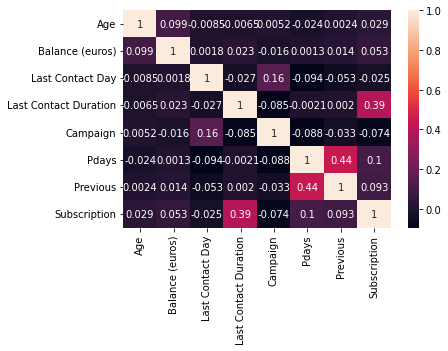

In [ ]:
#Hago matriz de correlaciones
corr = df.corr()
print(corr)
sns.heatmap(corr, annot=True)

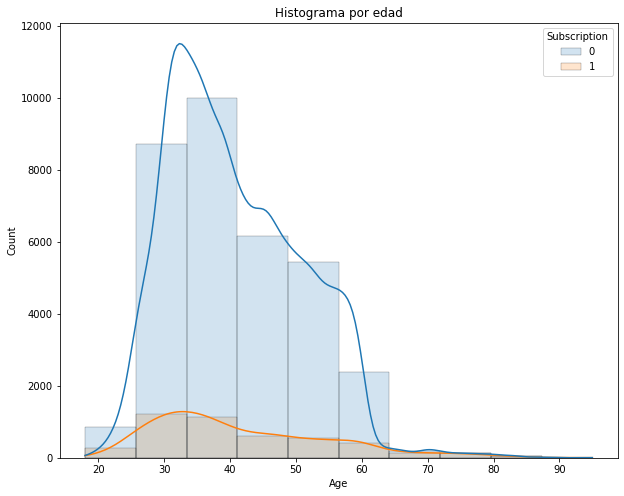

In [ ]:
#Histograma por edad
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
age=sns.histplot(df, x="Age", bins = 10,hue="Subscription", kde="True", alpha=0.2, linewidth=0.2)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histograma por edad")
plt.show(age)

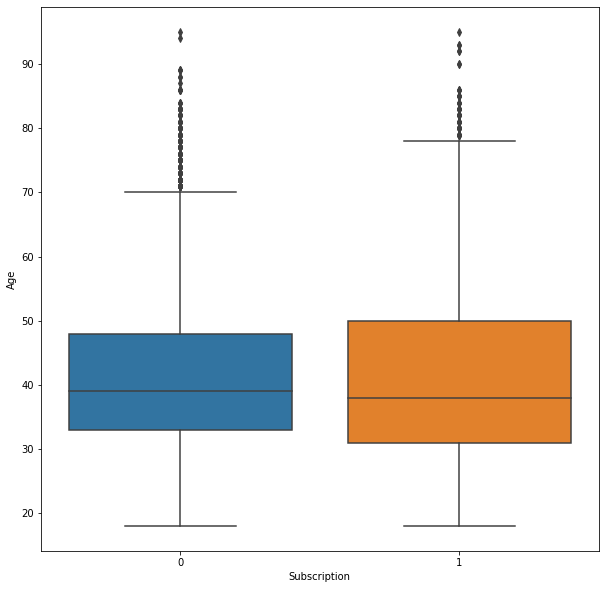

In [ ]:
#Boxplot para ver como se distribuye la edad 
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Subscription", y="Age", data=df)

In [ ]:
#Guardo el archivo
df.to_csv("TP IND 4.csv", index = False)

# Machine Learning

In [ ]:
#Interesa saber el determinante de la matriz de correlación para ver si la multicolinealidad
#genera problemas en la varianza a los coeficientes a obtener

det = np.linalg.det(corr)
det

#0.62 es un valor super aceptable (si fuese <0.1 es definitivamente malo y <0.2 habria que revisar atentamente)

0.6287513853697855

Preprocesamiento de datos

In [8]:
#Armamos los set de entrenamiento y testing para el random forest y creamos el modelo y los pre-procesamos para que sean más amenos a los modelos.

#Armamos pipelines para procesar los datos con OneHotEncoder y StandardScaler

y = df["Subscription"]
X = df.drop(columns = "Subscription")

X = X.replace(["yes"],1)
X = X.replace(["no"], 0)


#esto es horrible pero no encuentro como hacerlo mas eficiente
for i in range(0, len(X["Pdays"])):
  if X["Pdays"][i] == -1:
    X["Pdays"][i] = "No contactado"
  elif X["Pdays"][i] < 8:
    X["Pdays"][i] = "< 1 Semana"
  elif X["Pdays"][i] < 32:
    X["Pdays"][i] = "< 1 Mes"
  elif X["Pdays"][i] < 181:
    X["Pdays"][i] = "< 6 Meses"
  elif X["Pdays"][i] < 366:
    X["Pdays"][i] = "< 1 Año"
  else:
    X["Pdays"][i] = "> 1 Año"


#Armamos pipelines para procesar los datos con OneHotEncoder y StandardScaler
#armo pipeline para variables categoricas
#los SimpleImputer estan como factor de seguridad, el dataset ya está limpiado previamente
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

#armo pipeline para variables numericas
numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)

#separo columnas
cat_cols = X.select_dtypes(exclude="number").columns
num_cols = X.select_dtypes(include="number").columns

#procesador full
full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

# Aplico preprocessing
X_processed = full_processor.fit_transform(X)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1)
)
#separo el set en training y testing
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, random_state=1, stratify=y_processed)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#maximo beneficio que podria obtener: 279750
sum(y_test*250)


array([279750])

In [ ]:
sum(y_test*(-25))+sum((y_test-1)*50)
#maxima perdida posible: -452425

array([-452425])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38429 entries, 0 to 38428
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    38429 non-null  float64
 1   Job                    38429 non-null  object 
 2   Marital Status         38429 non-null  object 
 3   Education              38429 non-null  object 
 4   Default                38429 non-null  int64  
 5   Balance (euros)        38429 non-null  float64
 6   Housing Loan           38429 non-null  int64  
 7   Loan                   38429 non-null  int64  
 8   Contact                38429 non-null  object 
 9   Last Contact Day       38429 non-null  int64  
 10  Last Contact Month     38429 non-null  object 
 11  Last Contact Duration  38429 non-null  int64  
 12  Campaign               38429 non-null  int64  
 13  Pdays                  38429 non-null  object 
 14  Previous               38429 non-null  int64  
 15  Po

**Random Forest**

In [ ]:
#Entrenamiento y testing del Random Forest
clf=RandomForestClassifier(n_estimators = 1000, class_weight = "balanced")
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix[1,0]*(-25)+conf_matrix[0,1]*(-50)+conf_matrix[1,1]*250)

#beneficio obtenido: 63325


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9055995004163198
60475


**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix[1,0]*(-25)+conf_matrix[0,1]*(-50)+conf_matrix[1,1]*250)

#beneficio máximo de 69400 obtenido con n=1

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8806203164029975
69400


**XGBOOST**

In [ ]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")
xgb_cl.fit(X_train, y_train)

y_pred_test = xgb_cl.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix[1,0]*(-25)+conf_matrix[0,1]*(-50)+conf_matrix[1,1]*250)

#beneficio maximo: 78250
#xgboost viene siendo el mejor algoritmo
#accuarycy similar a random forest pero mucho mejor resultado economico

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9074729392173189
78250



**XGBOOST con GridSearchCV **



In [ ]:
#no vamos a explorar todos los hiperparametros posibles, pero se resaltan los más importantes y se varían y se fijan subsample y colsample_bytree para no hacer overfitting y que no consuma muchisimo tiempo
#esto tarda bastante en correr aprox 45 minutos a 1 hora (57 minutos ultima vez)

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_processed, y_processed)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(grid_cv.best_score_)
#el modelo armado con gridcv search tiene mejor accuracy

print(grid_cv.best_params_)

#{'colsample_bytree': 0.5,
# 'gamma': 0.25,
 #'learning_rate': 0.1,
 #'max_depth': 7,
 #'reg_lambda': 10,
 #'scale_pos_weight': 3,
 #'subsample': 0.8}

#teniendo en cuenta que de los hiperparametros que variamos algunos quedaron seleccionados en un extremo deberiamos correr este experimiento de nuevo
#testeamos igual como da con la matriz de confusion

xgb_cl = xgb.XGBClassifier(**grid_cv.best_params_, objective="binary:logistic")
xgb_cl.fit(X_train, y_train)

y_pred_test = xgb_cl.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix[1,0]*(-25)+conf_matrix[0,1]*(-50)+conf_matrix[1,1]*250)

#beneficio obtenido 165850!!


0.9341614870455026
{'colsample_bytree': 0.5, 'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 10, 'scale_pos_weight': 3, 'subsample': 0.8}


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9034138218151541
165850


In [ ]:
#cambio los valores de la param_grid
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]
param_grid["gamma"] = [0.25] #fijo porque quedo en el valor medio
#estos dos quedan fijos

# Give new value ranges to other params
param_grid["scale_pos_weight"] = [3, 5, 33952/4477] #el numero raro como fraccion es la versión balanceada
param_grid["max_depth"] = [7, 14, 20]
param_grid["reg_lambda"] = [0] #lambda no se puede bajar mas que cero
param_grid["learning_rate"] = [0.1, 0.4, 0.7, 1]


In [ ]:
#corremos otra vez el grid_search con los nuevos parametros
#esto tarda bastante (17 m tardo este)

# Init classifier
xgb_cl_2 = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv_2 = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv_2.fit(X_processed, y_processed)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(grid_cv_2.best_score_)
#el segundo modelo armado con gridcv search tiene peor accuracy y converge a casi los mismos parametros que antes

print(grid_cv_2.best_params_)
xgb_cl_2 = xgb.XGBClassifier(**grid_cv_2.best_params_, objective="binary:logistic")
xgb_cl_2.fit(X_train, y_train)

y_pred_test = xgb_cl_2.predict(X_test)
print(accuracy_score(y_test, y_pred_test))
#con esta forma de testear accuracy nos da peor

conf_matrix = confusion_matrix(y_test, y_pred_test)
print(conf_matrix[1,0]*(-25)+conf_matrix[0,1]*(-50)+conf_matrix[1,1]*250)
#beneficio economico: 162775

0.9325682804547436
{'colsample_bytree': 0.5, 'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'reg_lambda': 0, 'scale_pos_weight': 3, 'subsample': 0.8}


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9059117402164862
162775


**Armado de archivo para entregar**

In [ ]:
filename_test = "Bank Marketing test_set.csv"
df_test = pd.read_csv(filename_test)

In [ ]:
df_test.isna().sum() #clean

Age                      0
Job                      0
Marital Status           0
Education                0
Default                  0
Balance (euros)          0
Housing Loan             0
Loan                     0
Contact                  0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Poutcome                 0
dtype: int64

In [ ]:
print(X.info()) #super clean
print(X_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38429 entries, 0 to 38428
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    38429 non-null  float64
 1   Job                    38429 non-null  object 
 2   Marital Status         38429 non-null  object 
 3   Education              38429 non-null  object 
 4   Default                38429 non-null  int64  
 5   Balance (euros)        38429 non-null  float64
 6   Housing Loan           38429 non-null  int64  
 7   Loan                   38429 non-null  int64  
 8   Contact                38429 non-null  object 
 9   Last Contact Day       38429 non-null  int64  
 10  Last Contact Month     38429 non-null  object 
 11  Last Contact Duration  38429 non-null  int64  
 12  Campaign               38429 non-null  int64  
 13  Pdays                  38429 non-null  object 
 14  Previous               38429 non-null  int64  
 15  Po

In [ ]:
#Hay que preprocesar el test_set para que quede con el mismo formato que el training_set
#Armamos pipelines para procesar los datos con OneHotEncoder y StandardScaler

X_final = df_test

X_final = X_final.replace(["yes"],1)
X_final = X_final.replace(["no"], 0)


#esto es horrible pero no encuentro como hacerlo mas eficiente
for i in range(0, len(X_final["Pdays"])):
  if X_final["Pdays"][i] == -1:
    X_final["Pdays"][i] = "No contactado"
  elif X_final["Pdays"][i] < 8:
    X_final["Pdays"][i] = "< 1 Semana"
  elif X_final["Pdays"][i] < 32:
    X_final["Pdays"][i] = "< 1 Mes"
  elif X_final["Pdays"][i] < 181:
    X_final["Pdays"][i] = "< 6 Meses"
  elif X_final["Pdays"][i] < 366:
    X_final["Pdays"][i] = "< 1 Año"
  else:
    X_final["Pdays"][i] = "> 1 Año"


#Armamos pipelines para procesar los datos con OneHotEncoder y StandardScaler
#armo pipeline para variables categoricas
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

#armo pipeline para variables numericas
numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)

#separo columnas
cat_cols = X_final.select_dtypes(exclude="number").columns
num_cols = X_final.select_dtypes(include="number").columns

#procesador full
full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

# Aplico preprocessing
X_final_processed = full_processor.fit_transform(X_final)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#Predicción final con el mejor modelo obtenido

y_pred_final = xgb_cl.predict(X_final_processed)

#armo dataframe de entrega
entrega = df_test
entrega["y-Subscription"] = y_pred_final

In [ ]:
#Guardo el archivo
entrega.to_csv("Bank Marketing test_set.csv", index = False)